# 케라스 콜백과 텐서보드를 사용한 딥러닝 모델 검사와 모니터링

## 1. 콜백을 사용하여 모델의 훈련 과정 제어하기

### 1.1. ModelCheckpoint와 EarlyStopping 콜백

In [ ]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=1,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x, y,
          epochs=10,
          batch_size32,
          callbacks=callbacks_list,
          validation_data=(x_val, y_val))

### 1.2. ReduceLROnPlateau 콜백

In [ ]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10,
    )
]

model.fit(x, y,
          epochs=10,
          batch_size=32,
          callbacks=callbacks_list,
          validation_data=(x_val, y_val))

### 1.3. 자신만의 콜백 만들기

In [ ]:
import keras
import numpy as np


class ActivationLogger(keras.callbacks.Callback):

    def set_model(self, model):
        self.model = model
        layer_outputs = [layer.output for layer in model.layers]
        self.activations_model = keras.models.Model(model.input, layer_outputs)

    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is None:
            raise RuntimeError('Requires validation_data.')

        validation_sample = self.validation_data[0][0:1]
        activations = self.activations_model.predict(validation_sample)
        f = open('activations_at_epoch_' + str(epoch) + '.npz', 'wb')
        np.savez(f, activations)
        f.close()

## 2. 텐서보드 소개: 텐서플로의 시각화 프레임워크

In [1]:
# 텐서보드를 사용한 텍스트 분류 모델
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.data_utils.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.data_utils.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 500, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                        

In [2]:
# 텐서보드 콜백과 함께 모델 훈련하기
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
    )
]
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20


2023-06-10 09:53:17.337262: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 30s 190ms/step - loss: 0.5723 - acc: 0.6952 - val_loss: 0.3973 - val_acc: 0.8500
Epoch 2/20
157/157 [==============================] - 19s 118ms/step - loss: 0.4104 - acc: 0.8558 - val_loss: 0.4100 - val_acc: 0.8656
Epoch 3/20
157/157 [==============================] - 19s 122ms/step - loss: 0.3656 - acc: 0.8866 - val_loss: 0.5985 - val_acc: 0.8430
Epoch 4/20
157/157 [==============================] - 15s 94ms/step - loss: 0.2997 - acc: 0.9098 - val_loss: 0.5608 - val_acc: 0.8622
Epoch 5/20
157/157 [==============================] - 13s 83ms/step - loss: 0.2594 - acc: 0.9240 - val_loss: 0.7344 - val_acc: 0.8456
Epoch 6/20
157/157 [==============================] - 12s 78ms/step - loss: 0.2296 - acc: 0.9457 - val_loss: 0.6516 - val_acc: 0.8674
Epoch 7/20
157/157 [==============================] - 11s 72ms/step - loss: 0.1770 - acc: 0.9661 - val_loss: 0.6973 - val_acc: 0.8770
Epoch 8/20
157/157 [==============================] - 10s 63ms/step - 

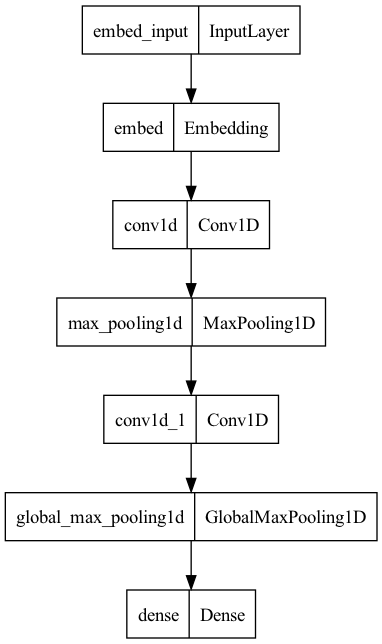

In [3]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

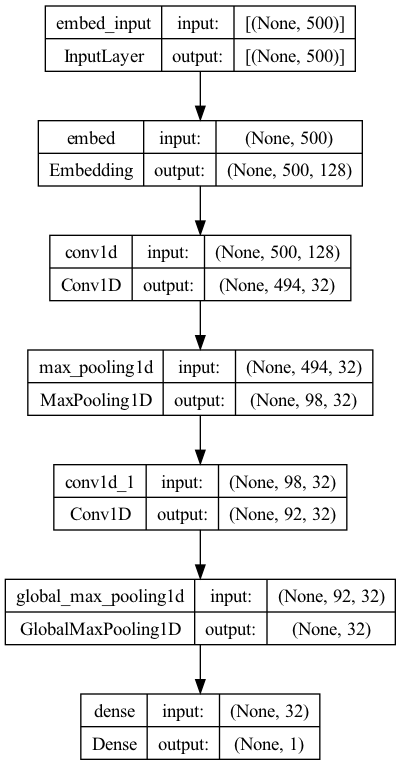

In [4]:
plot_model(model, show_shapes=True, to_file='model.png')